In [ ]:
import torch
import matplotlib.pyplot as plt

from gnn.src.data.dataset import InMemoQM9Dataset
from gnn.src.train.trainer import Trainer

from gnn.src.nn.schnet import SchNet
from torch.optim import Adam
from torch.optim.lr_scheduler import ExponentialLR
from gnn.src.data.utils import get_property

In [ ]:
dataset = InMemoQM9Dataset('./records')

In [ ]:
trainer = Trainer(
    dataset=dataset,
    device='cuda',
    validation_split = 0.1,
    shuffle_dataset = True,
    dataset_size=len(dataset)
)

In [ ]:
model=SchNet(n_interactions=3, n_features=64, n_filters=64)
loss_function=torch.nn.MSELoss()
optimizer=Adam(model.parameters(), lr=10e-6)
scheduler = ExponentialLR(optimizer, gamma=0.9)

losses_train_mean, losses_val_mean = trainer.train(
    model=model,
    loss_function=loss_function,
    optimizer=optimizer,
    scheduler=scheduler,
    max_epochs=100,
    models_dir='./models',
    checkpoint_frequency=10,
    property='G',
    map_property=lambda t: get_property(t, "G"),
    aggregate_outputs=lambda outputs: torch.sum(outputs)
)

### loss

<details>
  <summary>losses_train_mean</summary>
  [76.45157415432531, 2.9447524230762787, 1.0039772621432748, 0.36979457384612163, 0.15631181576935574, 0.08132324675371093, 0.051268740831783226, 0.03640628324982868, 0.027882165362313117, 0.021843271195135853, 0.017140202666625064, 0.014101746889863528, 0.012057843285866884, 0.010341517816898014, 0.009090805613251839, 0.00810922273116383, 0.007296351772149207, 0.006625136755285101, 0.005879850331341136, 0.005370747128869582, 0.004701408799165359, 0.004372088502219397, 0.004094569461703348, 0.003769275974952183, 0.0035637491005479295, 0.003369449772985454, 0.0031447131802730096, 0.0030186737134467794, 0.0028402463284091573, 0.002713159759673174, 0.0024102613828189835, 0.0023206463999037633, 0.002204308647317834, 0.0021639200369620894, 0.0020787072220771036, 0.001977218038166881, 0.0019349757357793632, 0.0018580011076213881, 0.0018067519782537984, 0.0017437798041341976, 0.0015685971547577827, 0.00149509147914753, 0.0014753416218834478, 0.0014360342942173782, 0.0014108207690605092, 0.0013594525455682524, 0.001320801429804031, 0.0013001819740723736, 0.001259774916985459, 0.0012557014151973972, 0.001120794180482688, 0.0010844017508903207, 0.0010864799612867288, 0.0010448564086046254, 0.0010253377477810433, 0.0010304026671914281, 0.001005711248367103, 0.0009709252627588315, 0.0009777906280001448, 0.000939005689151556, 0.0008435682197150625, 0.0008297724142068004, 0.0008271009430614319, 0.0008154478176449586, 0.00079521081901728, 0.0007939490774524423, 0.0007934232594386194, 0.000771764974186678, 0.0007765993684066301, 0.0007447388994147157, 0.0006819951132580654, 0.0006857949360962163, 0.0006473383590167943, 0.0006613896454013879, 0.000658432423138736, 0.0006407779137727039, 0.0006505045067587491, 0.0006345981514912985, 0.0006381237476377441, 0.0006225089538416865, 0.0005670266174255546, 0.0005673885111059738, 0.0005557802432367907, 0.0005534374262777392, 0.000538690671666329, 0.0005369742113588899, 0.0005497610930018073, 0.0005375540738772334, 0.0005286450378134325, 0.0005235947200729694, 0.00047550152406395014, 0.00047214485872885015, 0.0004791474184672446, 0.00046851440441924934, 0.0004555288082447424, 0.0004604957820380257, 0.000465824096334894, 0.000459050674896733, 0.00046069646933507777, 0.0004488803627493731]
</details>


<details>
  <summary>losses_val_mean</summary>
  [4.440884031503538, 1.5688881186257007, 0.5497094781681715, 0.19381266419441878, 0.09276151361869532, 0.049082334717799096, 0.03384981074931547, 0.024085538582631457, 0.03398905474714704, 0.014199966231340788, 0.009966164971195375, 0.02883497112944849, 0.013600890795433963, 0.00651557913787712, 0.007399494502250501, 0.003972611298757066, 0.009330471973466372, 0.004653399096420179, 0.00596323742991197, 0.0027898112540421295, 0.00521861497010807, 0.0023723225180112676, 0.002051572647080113, 0.002087975174731839, 0.001491780134221505, 0.0023543091391461306, 0.001820863228524521, 0.0015329579817432235, 0.0010145836828989825, 0.0034522677937076345, 0.0009824157434451379, 0.004847196476850665, 0.004451588746760258, 0.001429182541550952, 0.0008227489701666167, 0.0006598172532437658, 0.000807880899350793, 0.0010417926631522013, 0.0006260757799252527, 0.0016689800757326686, 0.0013918251225307154, 0.000684052555877348, 0.0007534020784027732, 0.0017493489200379679, 0.00091949926576017, 0.0005764833514713317, 0.0011571705926532187, 0.00395321708022858, 0.0007968704505464045, 0.0006596576027625163, 0.0005220556309815243, 0.00040743621103603295, 0.0007188851861197619, 0.0003855758423363684, 0.0012791097736293447, 0.000531774360180741, 0.0010723466251778948, 0.00034374890533660733, 0.0004888061070979596, 0.0005783621325403282, 0.0004438651397770445, 0.000604522842145184, 0.0011427705789610692, 0.0003809035795634072, 0.0014185536454128691, 0.0011458349304147395, 0.00040159922563057693, 0.0004321361064733083, 0.00031536785643574203, 0.0016586410788456626, 0.0003071329116757708, 0.0009400129331711848, 0.0003610185566728349, 0.0003056869433493241, 0.0005813160120712135, 0.00022653502658327298, 0.0002701379362646655, 0.000629228906863051, 0.0002648910456614595, 0.00029278836390788244, 0.00018673924144125377, 0.000254017242007105, 0.00021074779272102566, 0.00026324139207899004, 0.0002499186504139165, 0.0001853678655394105, 0.0006331389183087415, 0.0007420123387370893, 0.00023057279966804715, 0.0002931457015124773, 0.00017264761394806638, 0.0007984596859608213, 0.00017400447752041238, 0.00022686532641842254, 0.0007586120722486635, 0.0007491934065900972, 0.00019279037476543695, 0.0002299224201826758, 0.00040109038478216256, 0.0003171263740711445]
</details>

In [ ]:
losses_train_mean_MSE_Ha = [76.45157415432531, 2.9447524230762787, 1.0039772621432748, 0.36979457384612163, 0.15631181576935574, 0.08132324675371093, 0.051268740831783226, 0.03640628324982868, 0.027882165362313117, 0.021843271195135853, 0.017140202666625064, 0.014101746889863528, 0.012057843285866884, 0.010341517816898014, 0.009090805613251839, 0.00810922273116383, 0.007296351772149207, 0.006625136755285101, 0.005879850331341136, 0.005370747128869582, 0.004701408799165359, 0.004372088502219397, 0.004094569461703348, 0.003769275974952183, 0.0035637491005479295, 0.003369449772985454, 0.0031447131802730096, 0.0030186737134467794, 0.0028402463284091573, 0.002713159759673174, 0.0024102613828189835, 0.0023206463999037633, 0.002204308647317834, 0.0021639200369620894, 0.0020787072220771036, 0.001977218038166881, 0.0019349757357793632, 0.0018580011076213881, 0.0018067519782537984, 0.0017437798041341976, 0.0015685971547577827, 0.00149509147914753, 0.0014753416218834478, 0.0014360342942173782, 0.0014108207690605092, 0.0013594525455682524, 0.001320801429804031, 0.0013001819740723736, 0.001259774916985459, 0.0012557014151973972, 0.001120794180482688, 0.0010844017508903207, 0.0010864799612867288, 0.0010448564086046254, 0.0010253377477810433, 0.0010304026671914281, 0.001005711248367103, 0.0009709252627588315, 0.0009777906280001448, 0.000939005689151556, 0.0008435682197150625, 0.0008297724142068004, 0.0008271009430614319, 0.0008154478176449586, 0.00079521081901728, 0.0007939490774524423, 0.0007934232594386194, 0.000771764974186678, 0.0007765993684066301, 0.0007447388994147157, 0.0006819951132580654, 0.0006857949360962163, 0.0006473383590167943, 0.0006613896454013879, 0.000658432423138736, 0.0006407779137727039, 0.0006505045067587491, 0.0006345981514912985, 0.0006381237476377441, 0.0006225089538416865, 0.0005670266174255546, 0.0005673885111059738, 0.0005557802432367907, 0.0005534374262777392, 0.000538690671666329, 0.0005369742113588899, 0.0005497610930018073, 0.0005375540738772334, 0.0005286450378134325, 0.0005235947200729694, 0.00047550152406395014, 0.00047214485872885015, 0.0004791474184672446, 0.00046851440441924934, 0.0004555288082447424, 0.0004604957820380257, 0.000465824096334894, 0.000459050674896733, 0.00046069646933507777, 0.0004488803627493731]
losses_val_mean_MSE_Ha = [4.440884031503538, 1.5688881186257007, 0.5497094781681715, 0.19381266419441878, 0.09276151361869532, 0.049082334717799096, 0.03384981074931547, 0.024085538582631457, 0.03398905474714704, 0.014199966231340788, 0.009966164971195375, 0.02883497112944849, 0.013600890795433963, 0.00651557913787712, 0.007399494502250501, 0.003972611298757066, 0.009330471973466372, 0.004653399096420179, 0.00596323742991197, 0.0027898112540421295, 0.00521861497010807, 0.0023723225180112676, 0.002051572647080113, 0.002087975174731839, 0.001491780134221505, 0.0023543091391461306, 0.001820863228524521, 0.0015329579817432235, 0.0010145836828989825, 0.0034522677937076345, 0.0009824157434451379, 0.004847196476850665, 0.004451588746760258, 0.001429182541550952, 0.0008227489701666167, 0.0006598172532437658, 0.000807880899350793, 0.0010417926631522013, 0.0006260757799252527, 0.0016689800757326686, 0.0013918251225307154, 0.000684052555877348, 0.0007534020784027732, 0.0017493489200379679, 0.00091949926576017, 0.0005764833514713317, 0.0011571705926532187, 0.00395321708022858, 0.0007968704505464045, 0.0006596576027625163, 0.0005220556309815243, 0.00040743621103603295, 0.0007188851861197619, 0.0003855758423363684, 0.0012791097736293447, 0.000531774360180741, 0.0010723466251778948, 0.00034374890533660733, 0.0004888061070979596, 0.0005783621325403282, 0.0004438651397770445, 0.000604522842145184, 0.0011427705789610692, 0.0003809035795634072, 0.0014185536454128691, 0.0011458349304147395, 0.00040159922563057693, 0.0004321361064733083, 0.00031536785643574203, 0.0016586410788456626, 0.0003071329116757708, 0.0009400129331711848, 0.0003610185566728349, 0.0003056869433493241, 0.0005813160120712135, 0.00022653502658327298, 0.0002701379362646655, 0.000629228906863051, 0.0002648910456614595, 0.00029278836390788244, 0.00018673924144125377, 0.000254017242007105, 0.00021074779272102566, 0.00026324139207899004, 0.0002499186504139165, 0.0001853678655394105, 0.0006331389183087415, 0.0007420123387370893, 0.00023057279966804715, 0.0002931457015124773, 0.00017264761394806638, 0.0007984596859608213, 0.00017400447752041238, 0.00022686532641842254, 0.0007586120722486635, 0.0007491934065900972, 0.00019279037476543695, 0.0002299224201826758, 0.00040109038478216256, 0.0003171263740711445]

losses_train_mean_RMSE_eV = list(map(lambda x: (x*27.21)**0.5, losses_train_mean_MSE_Ha))
losses_val_mean_RMSE_eV = list(map(lambda x: (x*27.21)**0.5, losses_val_mean_MSE_Ha))

fig, axs = plt.subplots(nrows=2)
plt.tight_layout()
axs[0].plot(range(100), losses_train_mean_RMSE_eV, c='g')
axs[0].plot(range(100), losses_val_mean_RMSE_eV, c='b')
axs[0].legend (('Обучение', 'Валидация'))
axs[0].set(xlabel='Число эпох', ylabel='RMSE G, эВ')
axs[1].plot(range(10, 100), losses_train_mean_RMSE_eV[10:100], c='g')
axs[1].plot(range(10, 100), losses_val_mean_RMSE_eV[10:100], c='b')
axs[1].legend (('Обучение', 'Валидация'))
axs[1].set(xlabel='Число эпох', ylabel='RMSE G, эВ')
print(losses_val_mean_RMSE_eV[-1])
plt.show()

0.09289245738204928

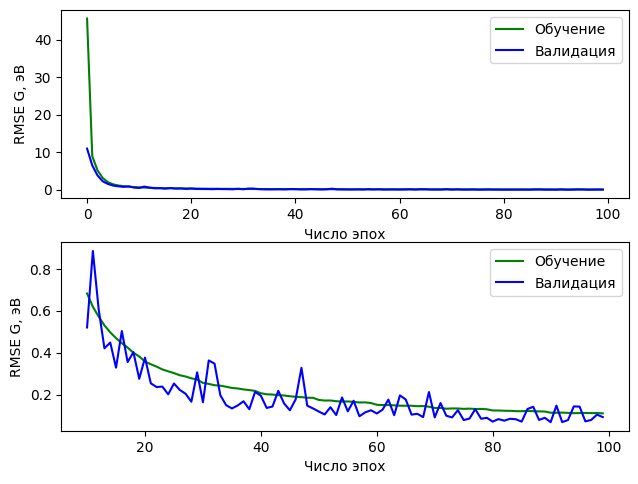